## Import Library and Understanding Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv('Data_Negara_HELP.csv')
data.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Dictionary

- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.

## Data Pre-processing & Exploratory Data Analysis (EDA)

In [4]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Great, we don't have missing values

In [5]:
# Check shape data
data.shape

(167, 10)

We have 167 rows and 10 columns in this data

In [6]:
# Check duplicated data
data.duplicated().sum()

0

Nice, we don't have duplicated data

In [7]:
# Check missing values
data.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Good, we don't have missing values in this data

In [8]:
# Check statistics of data
data.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<ipython-input-9-e5b42ef12ebc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i[1]])
<ipython-input-9-e5b42ef12ebc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i[1]])
<ipython-input-9-e5b42ef12ebc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

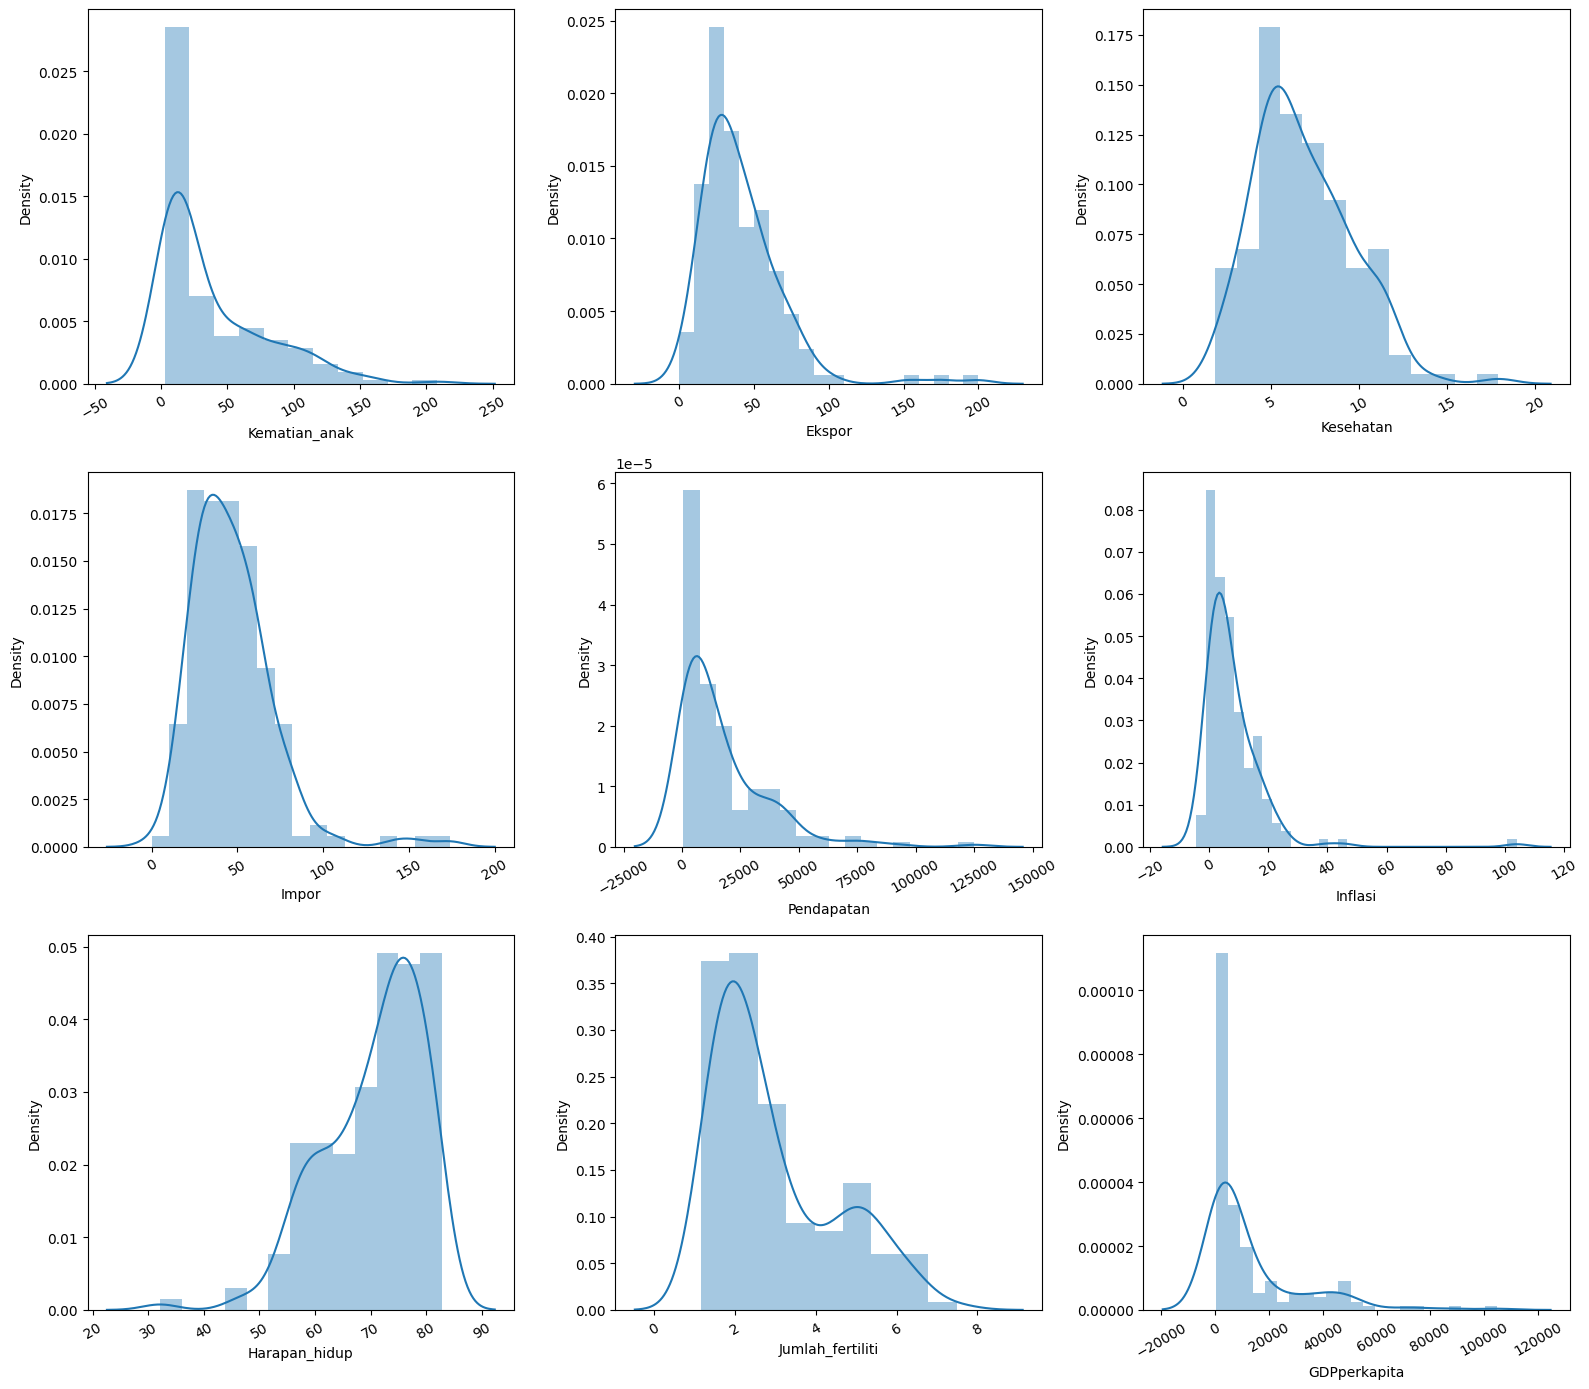

In [9]:
# Visualize with distribution plots
plt.figure(figsize=(16,14))

for i in enumerate(data.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.distplot(data[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

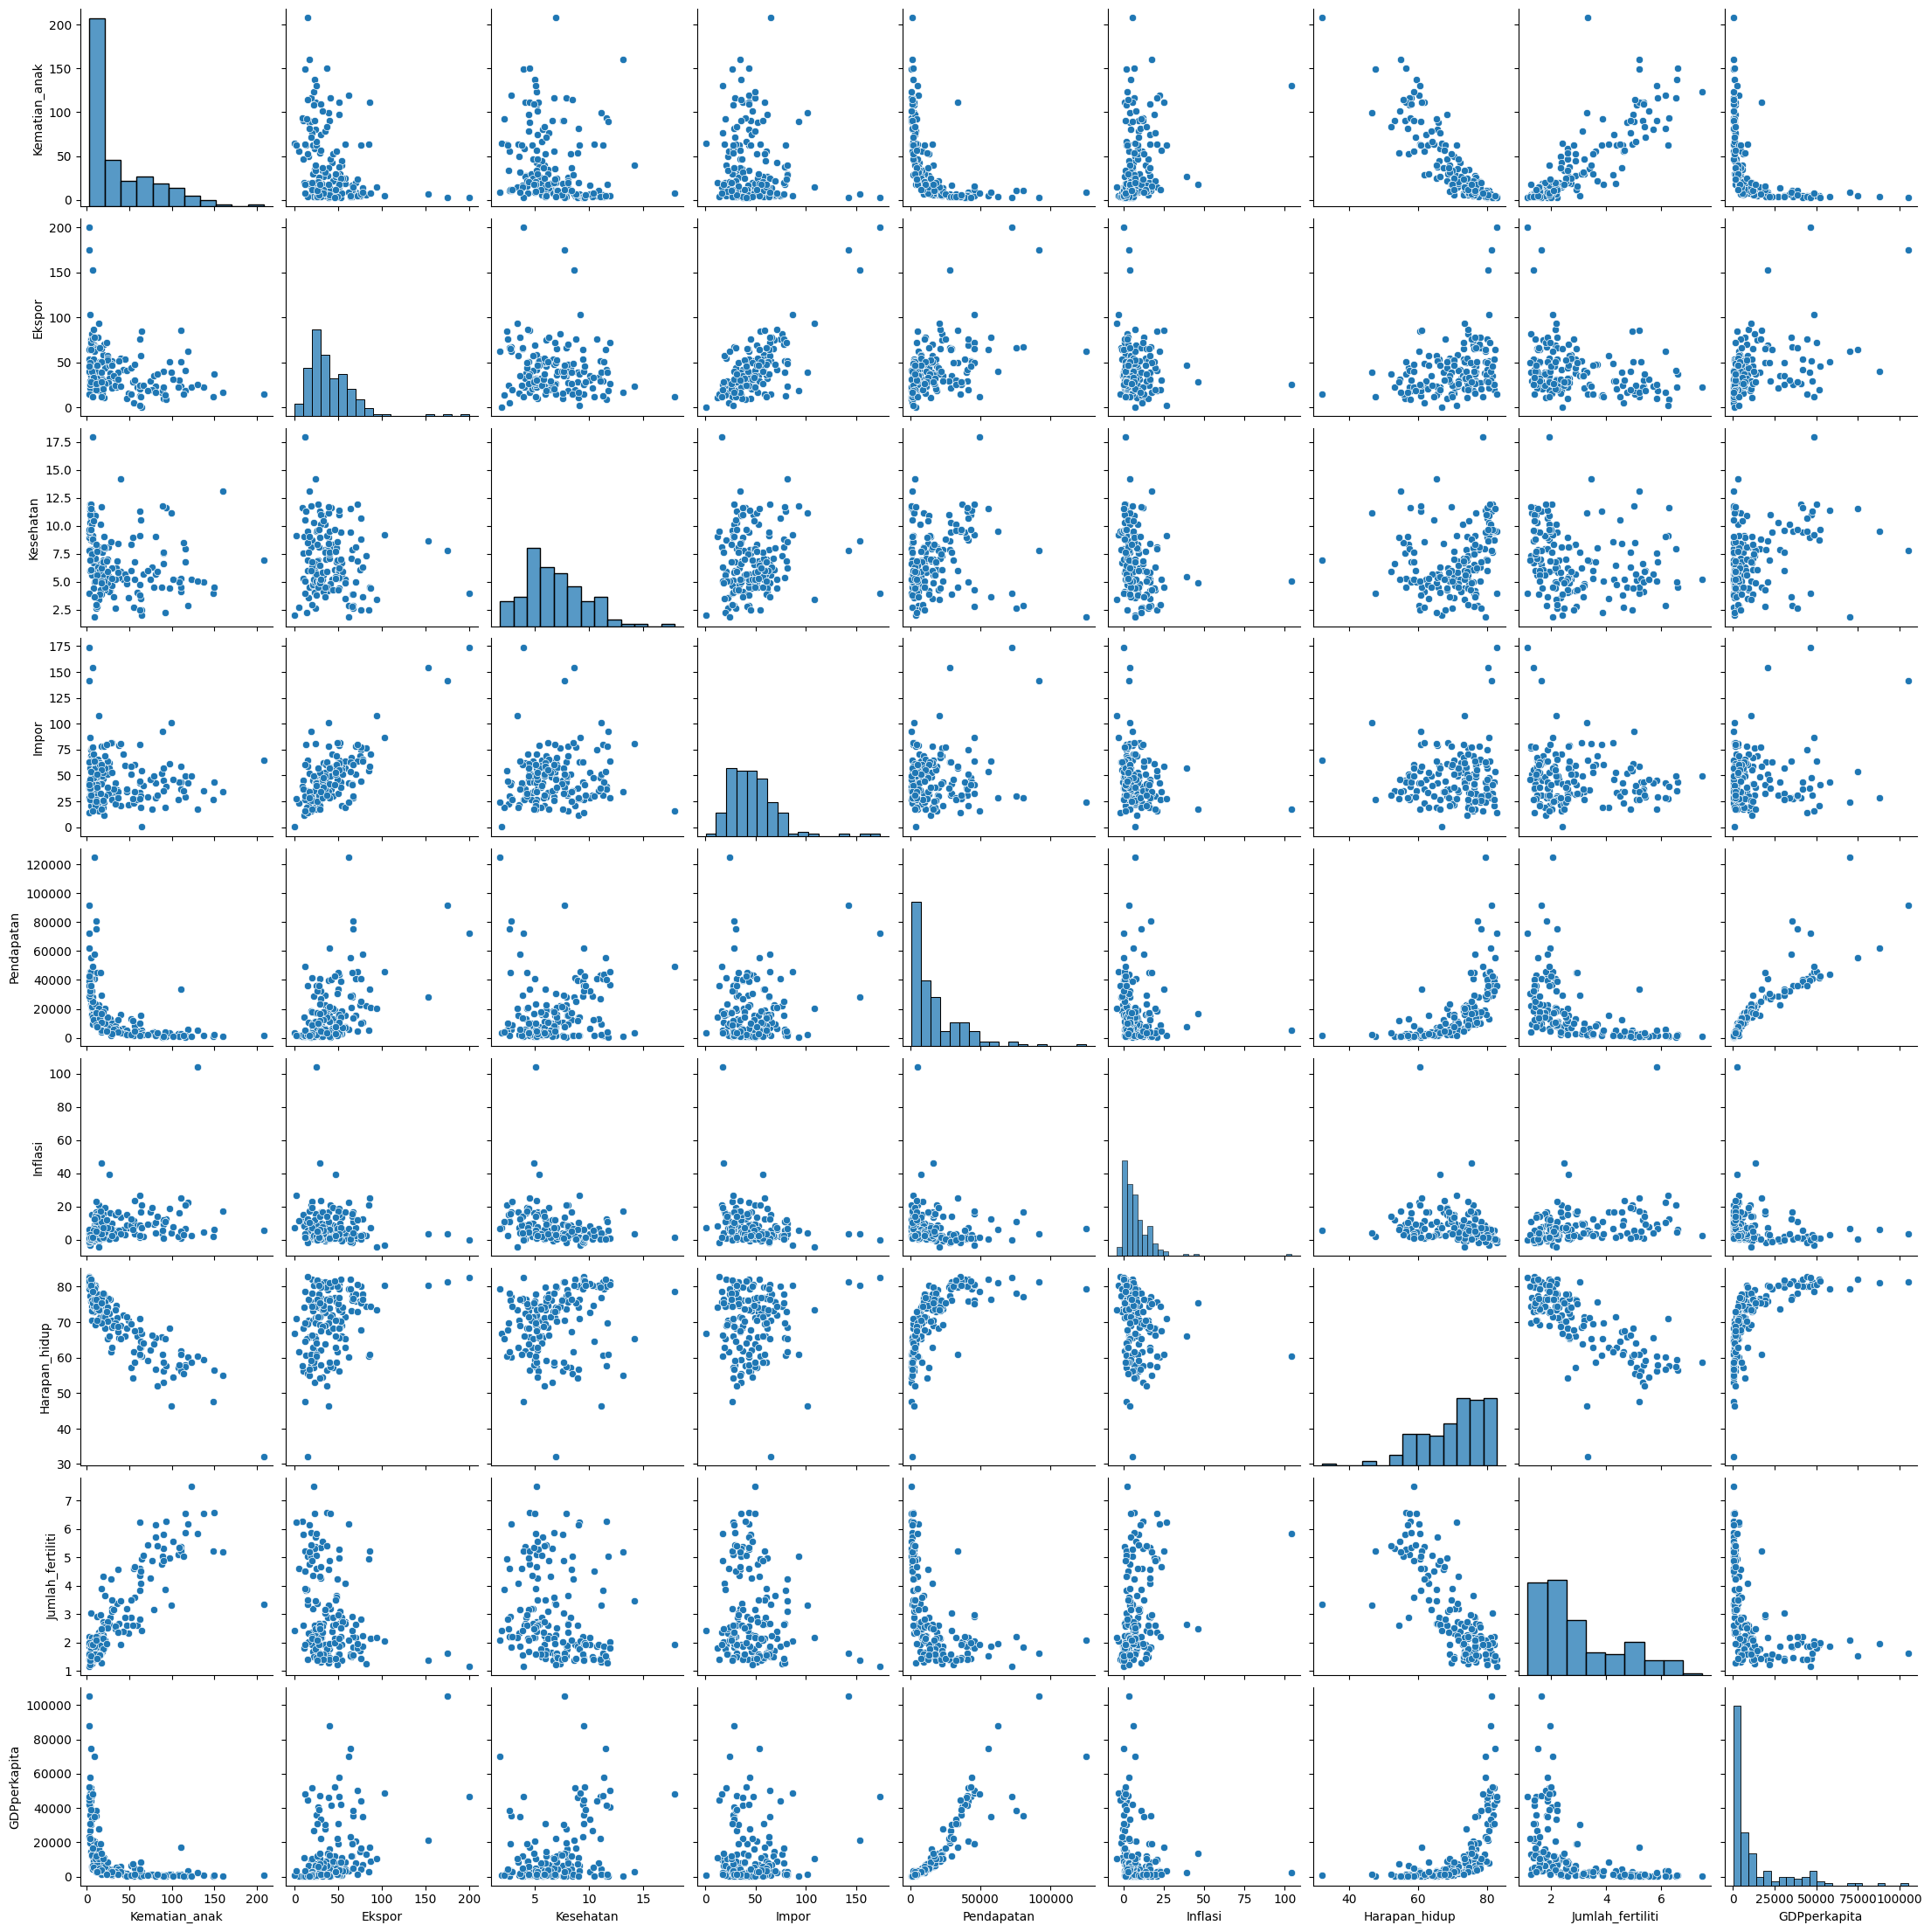

In [10]:
# Visualize with pair plot
plt.figure(figsize=(15,12))
sns.pairplot(data)
plt.show()

<ipython-input-11-b3452e2e41a6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


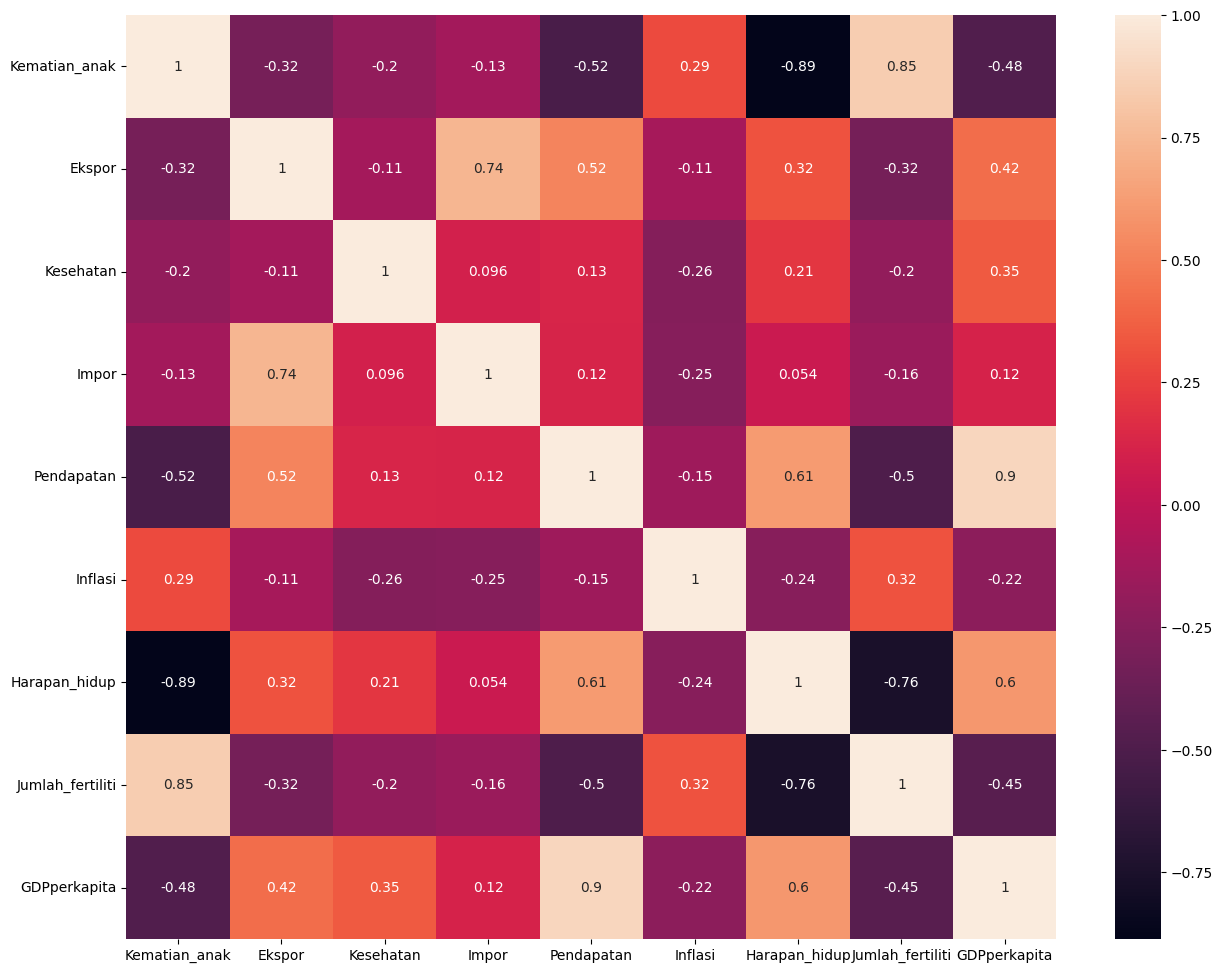

In [11]:
# Visualize with heatmap
plt.figure(figsize = (15,12))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [12]:
# Scaling data
data_num = data.drop(columns = 'Negara')
scaling = StandardScaler()
data_scaling = scaling.fit_transform(data_num)
data_scaling = pd.DataFrame(data_scaling, columns = data_num.columns)
data_scaling.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Build Model

In [24]:
# Clustering with n_cluster 2
kmeans = KMeans(n_clusters = 2, random_state = 101).fit(data_scaling)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
data['kmeans_cluster'] = labels
data.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,kmeans_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [15]:
data['kmeans_cluster'].value_counts()

1    99
0    68
Name: kmeans_cluster, dtype: int64

<Figure size 1500x1200 with 0 Axes>

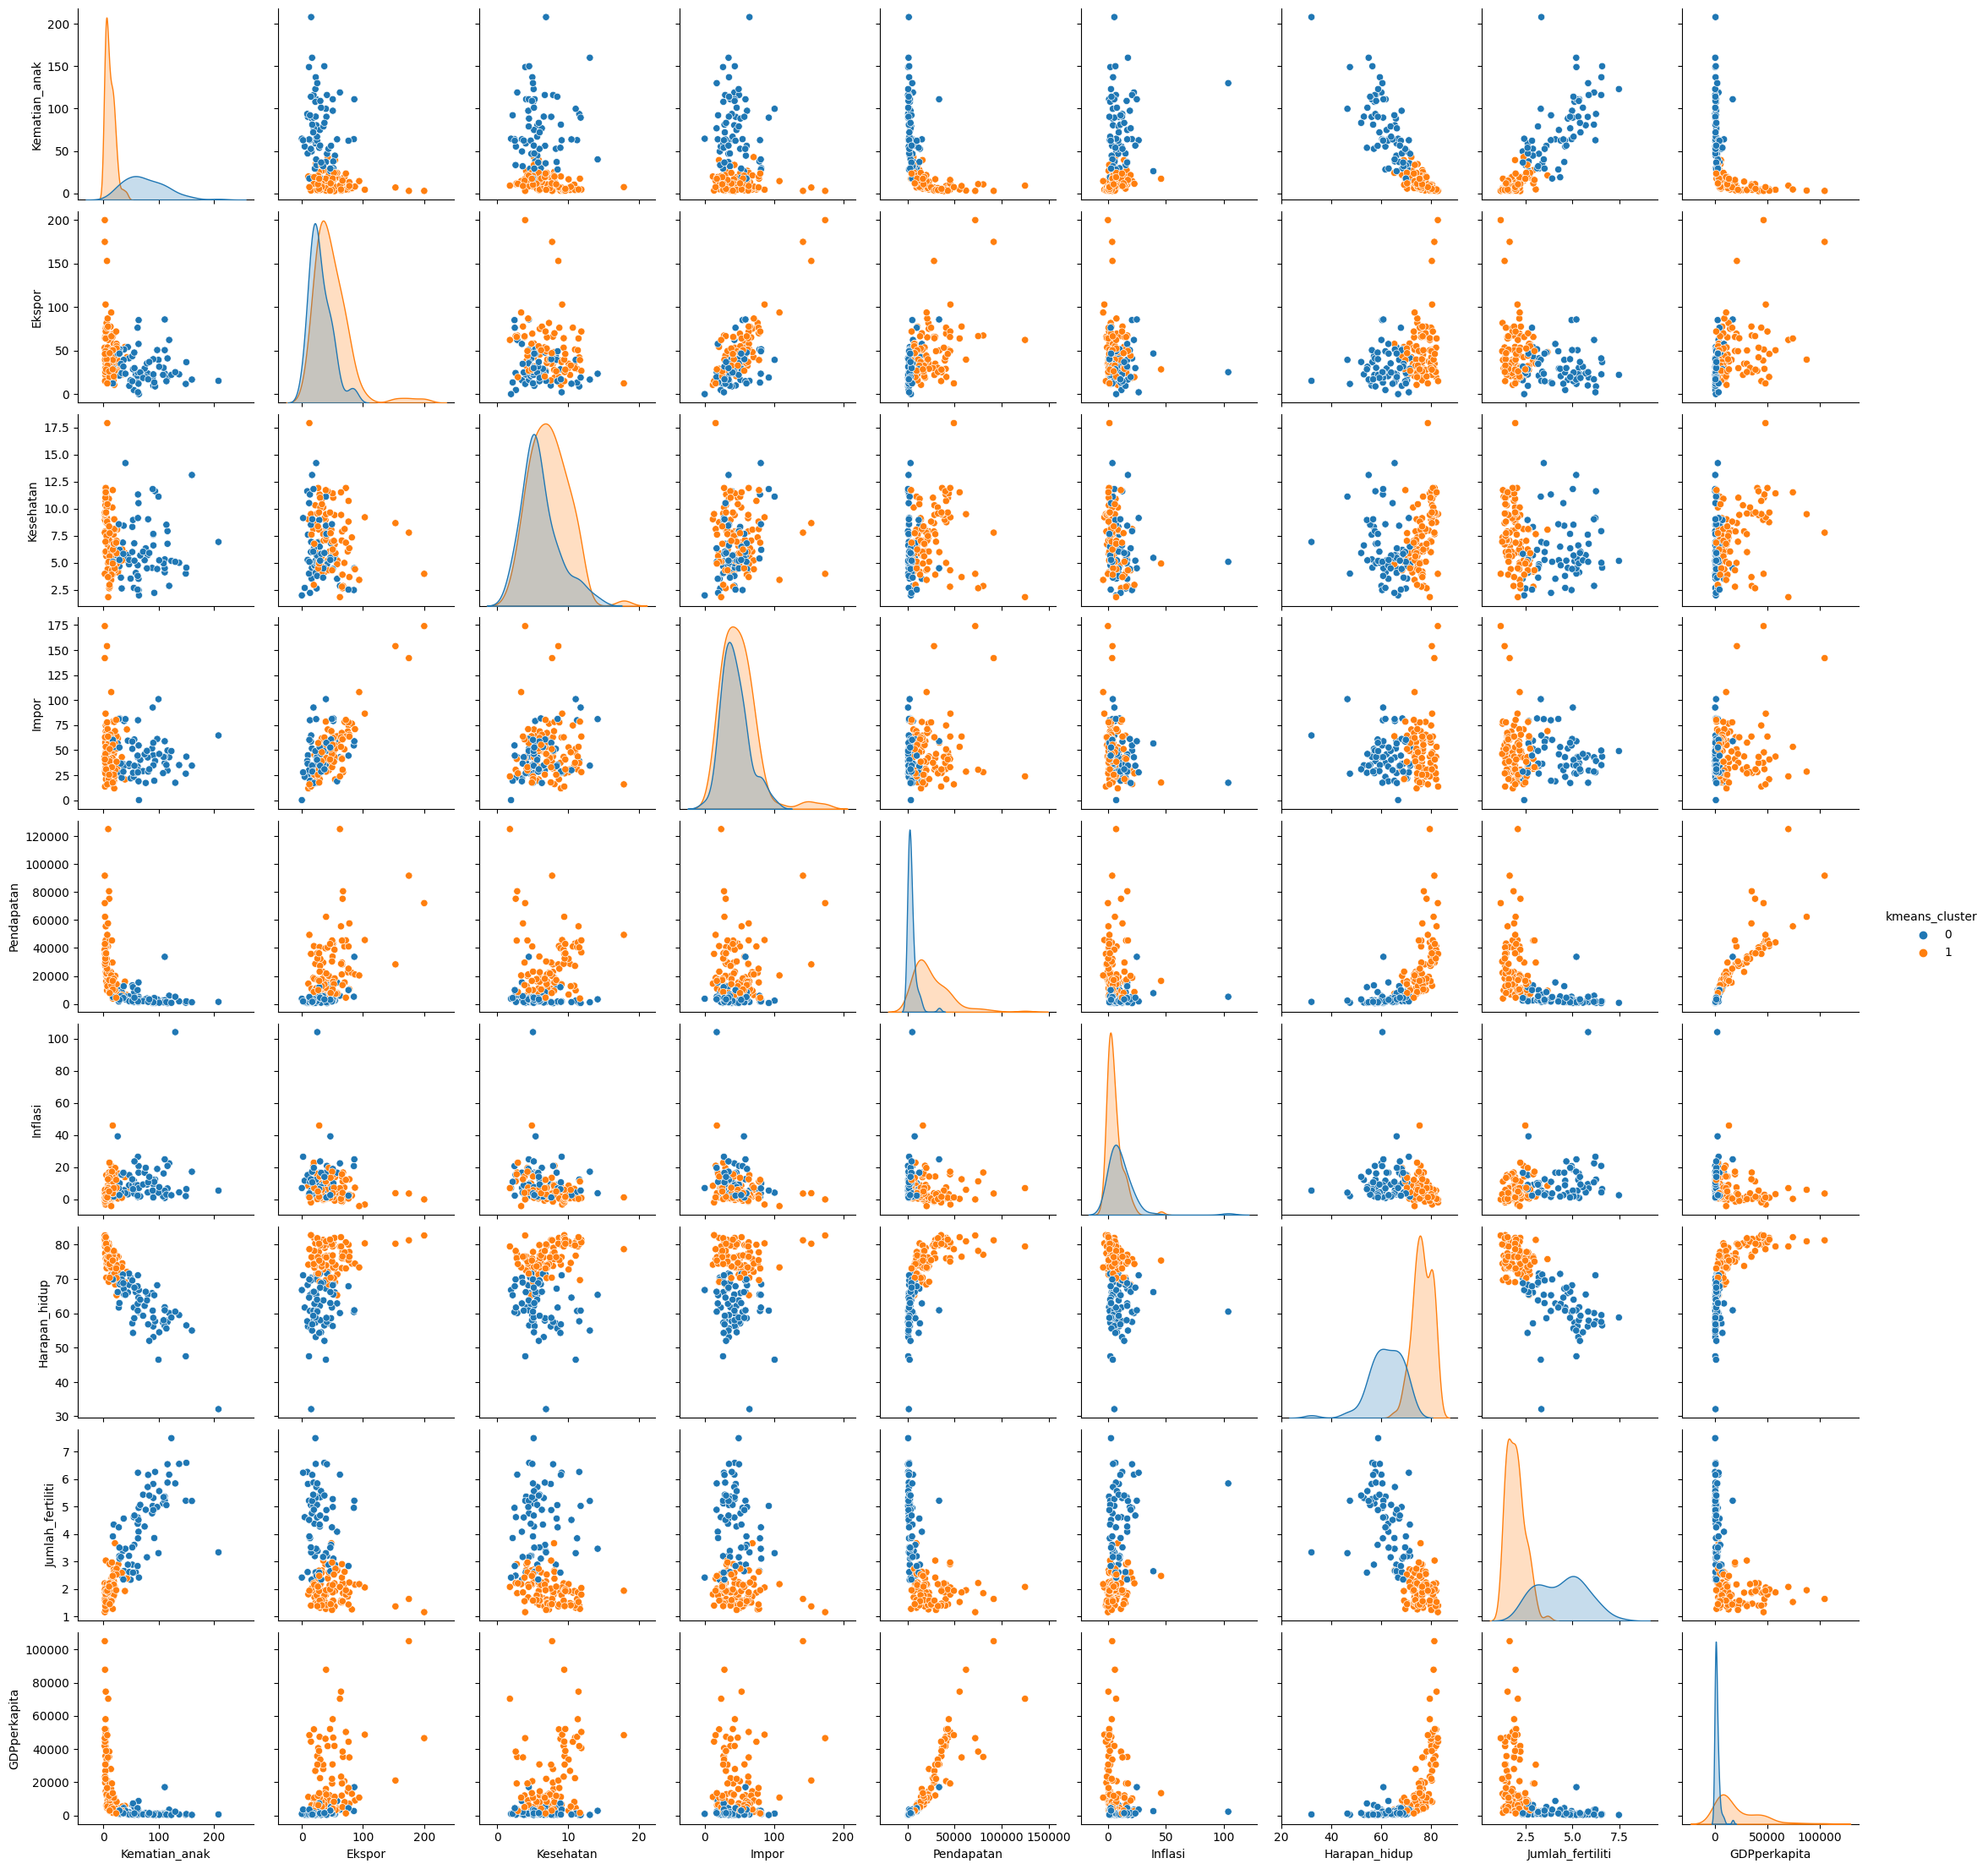

In [16]:
plt.figure(figsize=(15,12))
sns.pairplot(data, hue = 'kmeans_cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

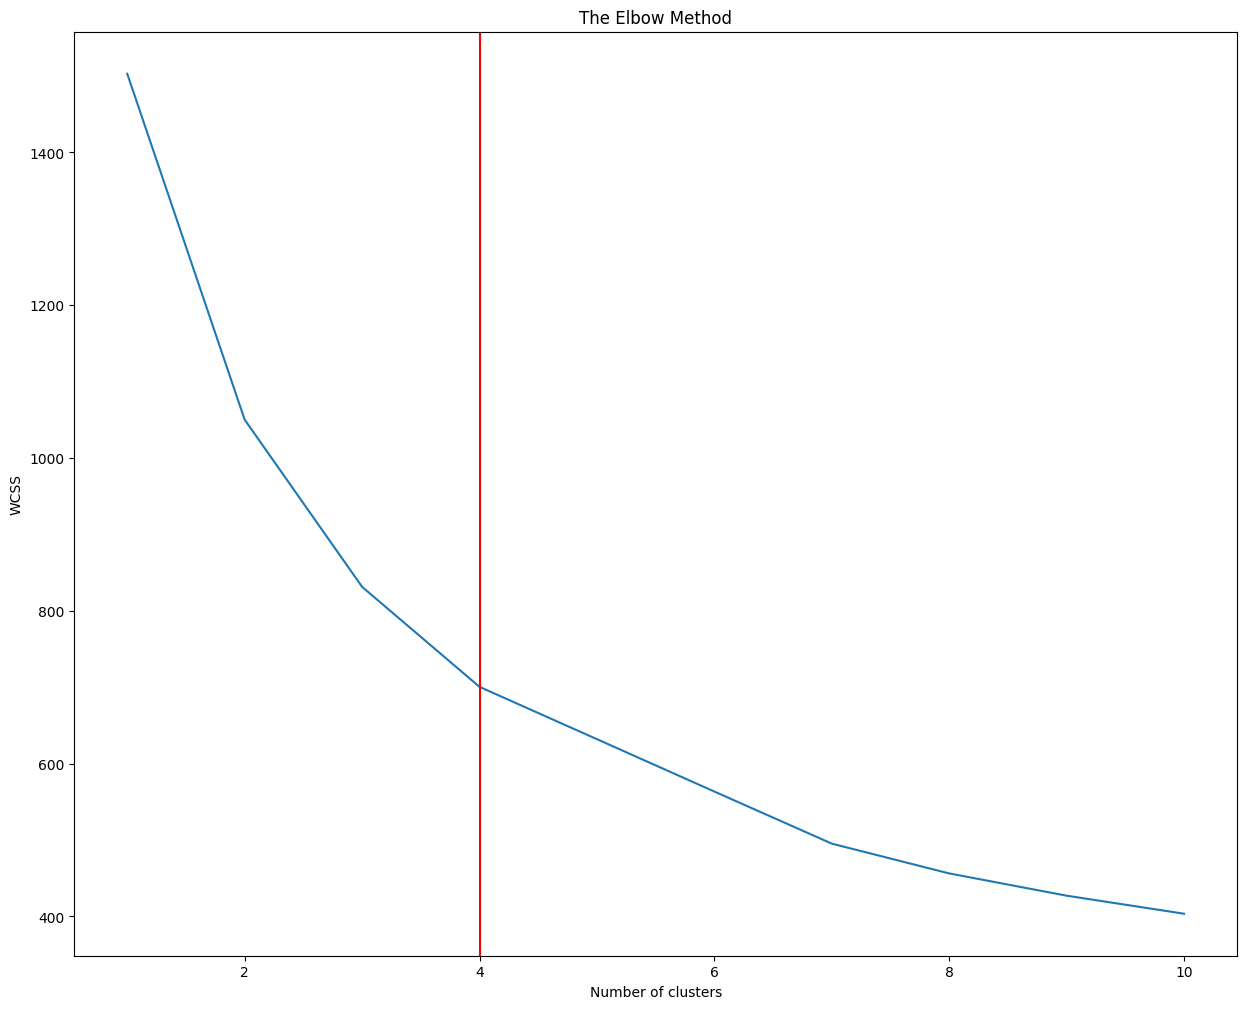

In [17]:
# Elbow method
wcss_sc = []

for i in range(1, 11):
    clustering_sc = KMeans(n_clusters=i, init='k-means++', random_state=101)
    clustering_sc.fit(data_scaling)
    wcss_sc.append(clustering_sc.inertia_)

plt.figure(figsize = (15,12))
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss_sc);
plt.axvline(x = 4, color = 'r')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans_new = KMeans(n_clusters = 4, random_state = 101)
kmeans_new.fit(data_scaling)
labels_new = kmeans_new.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
data['Cluster_new'] = labels_new
data = data.drop(columns = 'kmeans_cluster')
data.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster_new
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [27]:
data['Cluster_new'].value_counts()

3    85
1    47
0    32
2     3
Name: Cluster_new, dtype: int64

In [21]:
data_cluster = data.groupby('Cluster_new').agg('mean')
data_cluster['Total_cluster'] = data.groupby('Cluster_new')['Negara'].agg('count')
data_cluster.head()

<ipython-input-21-ab615047f79d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_cluster = data.groupby('Cluster_new').agg('mean')


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Total_cluster
Cluster_new,,,,,,,,,,
0,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788437,42118.750000,32
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,47
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,3
3,21.690588,41.073988,6.197059,47.914893,12671.411765,7.609341,72.871765,2.300706,6519.552941,85


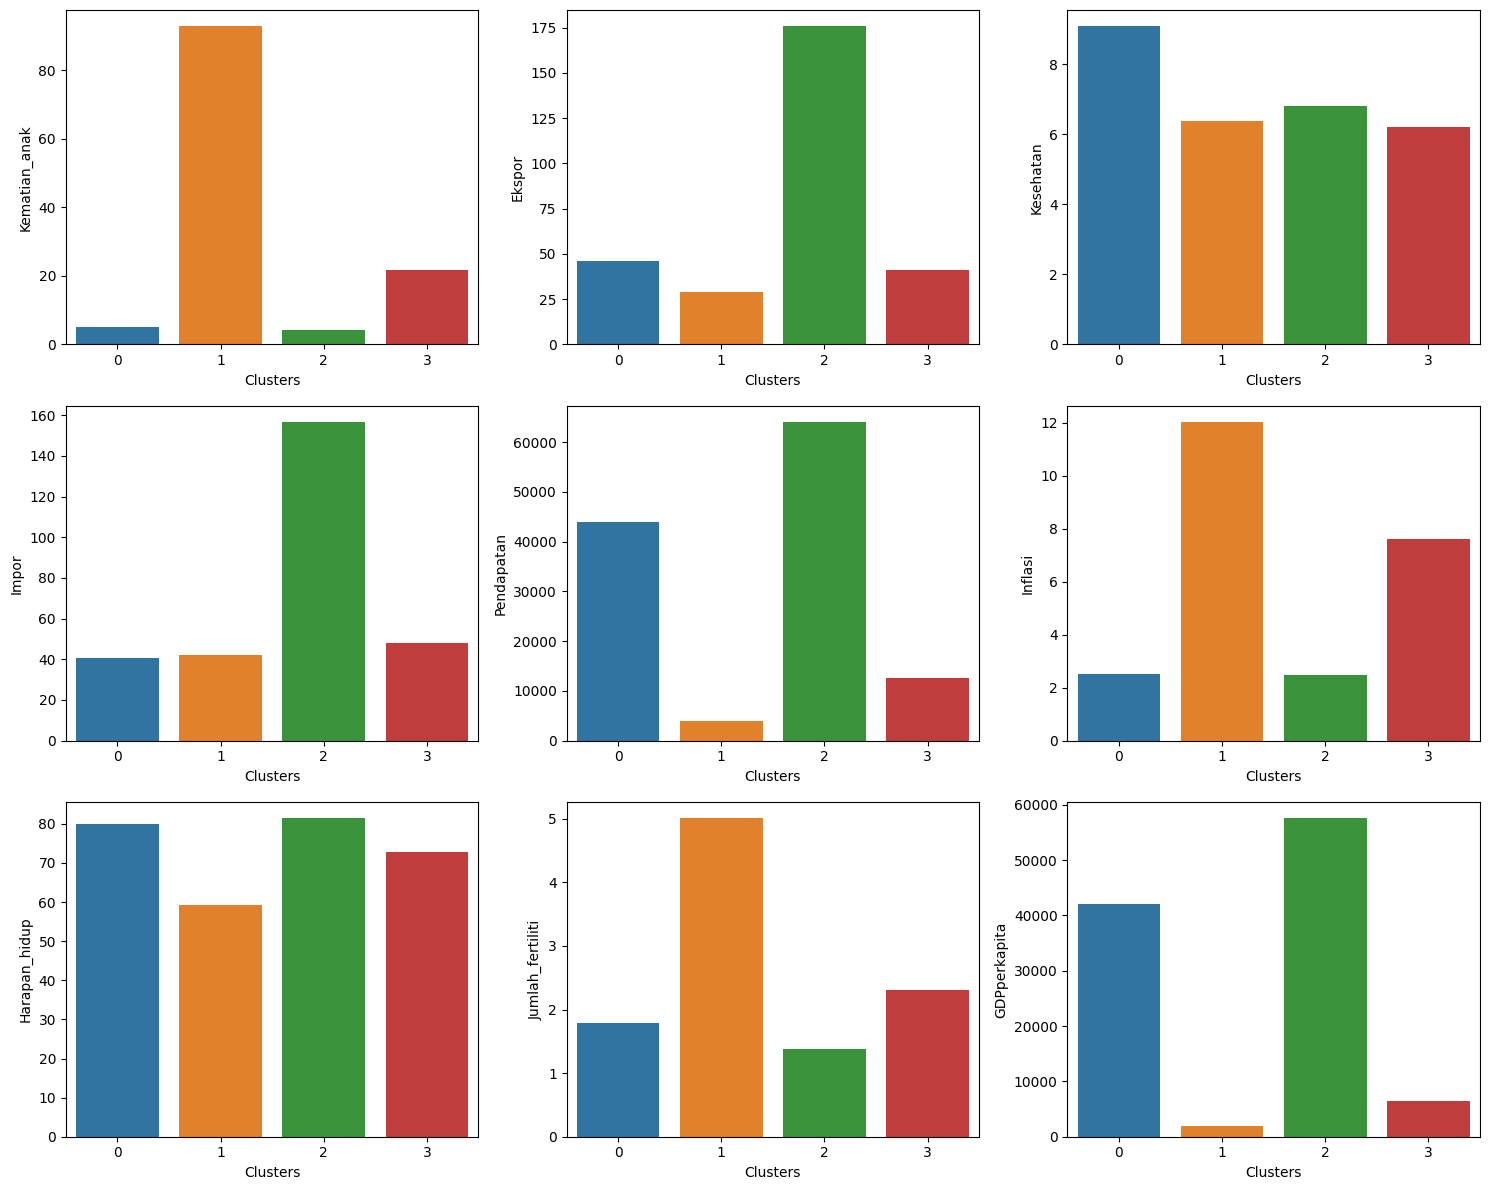

In [22]:
plt.figure(figsize = (15,12))
for i, var in enumerate(data_num.columns) :
    plt.subplot(3, 3, i+1)
    sns.barplot(x = data_cluster.reset_index()['Cluster_new'], y = data_cluster[var])
    plt.ylabel(var)
    plt.xlabel('Clusters')
plt.tight_layout()
plt.show()

In [23]:
data_country = data[data['Cluster_new'] == 1]
top10_country = data_country.sort_values(['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
                         ascending = [False, True, True, False, True, False, True, False, True])
top10_country.head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster_new
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,1
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,1
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1
